In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

from utils.df_loader import (
    load_adult_df,
    load_compas_df,
    load_german_df,
    load_diabetes_df,
    load_breast_cancer_df,
)
from sklearn.model_selection import train_test_split
from utils.preprocessing import preprocess_df
from utils.models import (
    train_models,
    evaluation_test,
    save_models,
    load_models,
)

from art.attacks.evasion import DeepFool, CarliniL0Method, CarliniLInfMethod, CarliniL2Method, BoundaryAttack
from art.estimators.classification import SklearnClassifier, KerasClassifier

from utils.preprocessing import DfInfo
from utils.preprocessing import inverse_dummy
from scipy.stats import pearsonr

seed = 42
# tf.random.set_seed(seed)
# np.random.seed(seed)

c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
# warnings.filterwarnings("ignore", message="divide by zero encountered in divide")
pd.options.mode.chained_assignment = None # suppress "SettingWithCopyWarning" warning

In [3]:
TRAIN_MODEL = False # (1)True(2)False
RUN_ART = True
num_instances = 64 # (1)&(2) 20

if RUN_ART:
    tf.compat.v1.disable_eager_execution()

print("TF version: ", tf.__version__)
print("Eager execution enabled: ", tf.executing_eagerly())  # False    

TF version:  2.10.0
Eager execution enabled:  False


In [4]:
#### Select dataset ####
for dataset_name in [
    "adult",
    # "german",
    #  "compas",
    # "diabetes",
    # "breast_cancer",
]:  # [adult, german, compas]
    print(f"Dataset Name: [{dataset_name}]")
    if dataset_name == "adult":
        dataset_loading_fn = load_adult_df
    elif dataset_name == "german":
        dataset_loading_fn = load_german_df
    elif dataset_name == "compas":
        dataset_loading_fn = load_compas_df
    elif dataset_name == "diabetes":
        dataset_loading_fn = load_diabetes_df
    elif dataset_name == "breast_cancer":
        dataset_loading_fn = load_breast_cancer_df
    else:
        raise Exception("Unsupported dataset")

    df_info = preprocess_df(dataset_loading_fn)

    train_df, test_df = train_test_split(
        df_info.dummy_df, train_size=0.8, random_state=seed, shuffle=True
    )
    X_train = np.array(train_df[df_info.ohe_feature_names])
    y_train = np.array(train_df[df_info.target_name])
    X_test = np.array(test_df[df_info.ohe_feature_names])
    y_test = np.array(test_df[df_info.target_name])



Dataset Name: [adult]


In [5]:
### Load models
models = load_models(X_train.shape[-1], dataset_name)


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [6]:
num_instances = 64 # (1)&(2) 20

X_test_re=X_test[0:num_instances]
y_test_re=y_test[0:num_instances]


In [7]:
max_iter_list = []
curr_delta_list = []
curr_epsilon_list = []

for max_iter in range(50,5001,50):
    print(f'{max_iter} Done.')
    max_iter_list.append(max_iter)
    attack = BoundaryAttack(estimator=SklearnClassifier(models['gbc'], clip_values=(0,1)), verbose= False, batch_size=64, max_iter=max_iter)
    x_adv = attack.generate(X_test_re,y_test_re) 
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        curr_delta_list.append(attack.curr_delta)
        # print(f'The current delta is: {attack.curr_delta}')
        curr_epsilon_list.append(attack.curr_epsilon)
        # print(f'The current epsilon is: {attack.curr_epsilon}')
    else:
        break

50 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


100 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


150 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


200 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


250 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


300 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


350 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


400 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


450 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


500 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


550 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


600 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


650 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


700 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


750 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


800 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


850 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


900 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


950 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1000 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1050 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1100 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1150 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1200 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1250 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1300 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1350 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1400 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1450 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1500 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1550 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1600 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1650 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1700 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1750 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1800 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1850 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1900 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


1950 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2000 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2050 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2100 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2150 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2200 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2250 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2300 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2350 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2400 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2450 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2500 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2550 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2600 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2650 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2700 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2750 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2800 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2850 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2900 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2950 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3000 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3050 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3100 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3150 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3200 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3250 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3300 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3350 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3400 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3450 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3500 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3550 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3600 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3650 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3700 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3750 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3800 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3850 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3900 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3950 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4000 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4050 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4100 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4150 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4200 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4250 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4300 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4350 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4400 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4450 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4500 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4550 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4600 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4650 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4700 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4750 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4800 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4850 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4900 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


4950 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


5000 Done.


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
# max_iter_list 
# curr_delta_list
# curr_epsilon_list


C:\Users\n10599070\AppData\Local\Temp\ipykernel_33936\2300679380.py:2: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


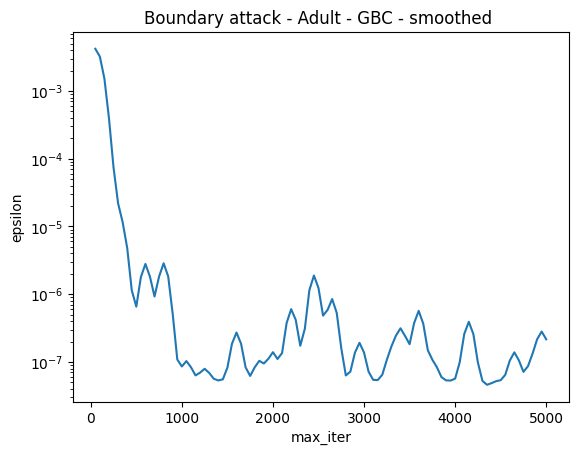

In [15]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
ysmoothed = gaussian_filter1d(curr_epsilon_list, sigma=1)

plt.plot(max_iter_list, ysmoothed)
plt.yscale('log')
plt.title(f'Boundary attack - Adult - GBC - smoothed ')
plt.ylabel(f'epsilon')
plt.xlabel(f'max_iter')
plt.show()
# plt.scatter(x, y)

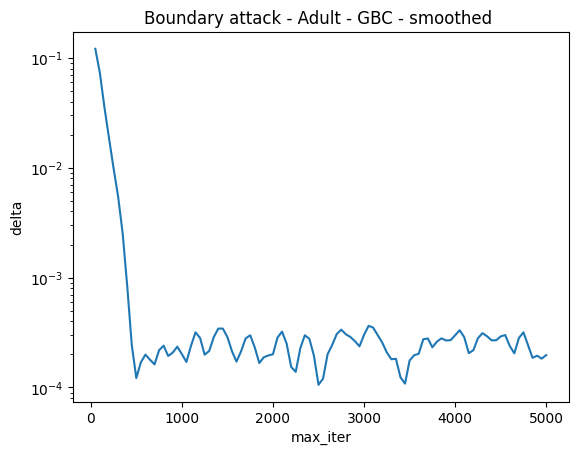

In [22]:
ysmoothed = gaussian_filter1d(curr_delta_list, sigma=1)

plt.plot(max_iter_list, ysmoothed)
plt.yscale('log')
plt.title(f'Boundary attack - Adult - GBC - smoothed ')
plt.ylabel(f'delta')
plt.xlabel(f'max_iter')
plt.show()
# plt.scatter(x, y)

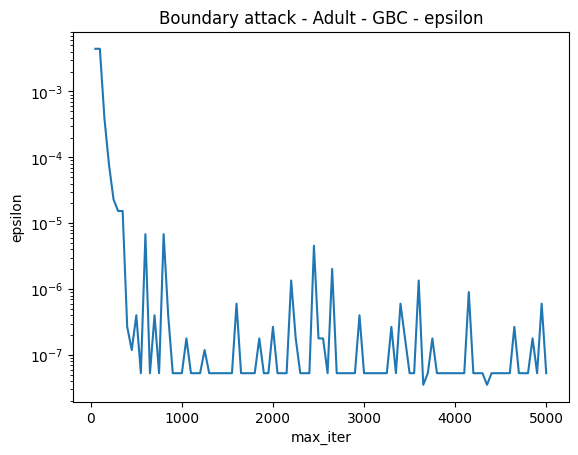

In [25]:
plt.plot(max_iter_list, curr_epsilon_list)
plt.yscale('log')
plt.title(f'Boundary attack - Adult - GBC - epsilon')
plt.ylabel(f'epsilon')
plt.xlabel(f'max_iter')

plt.show()

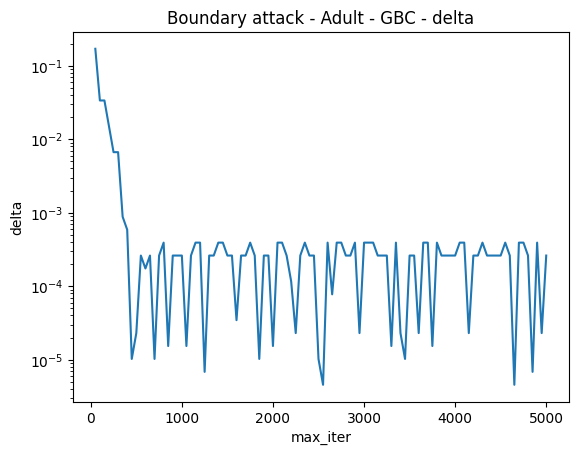

In [24]:
plt.plot(max_iter_list, curr_delta_list)
plt.yscale('log')
plt.title(f'Boundary attack - Adult - GBC - delta')
plt.ylabel(f'delta')
plt.xlabel(f'max_iter')

plt.show()

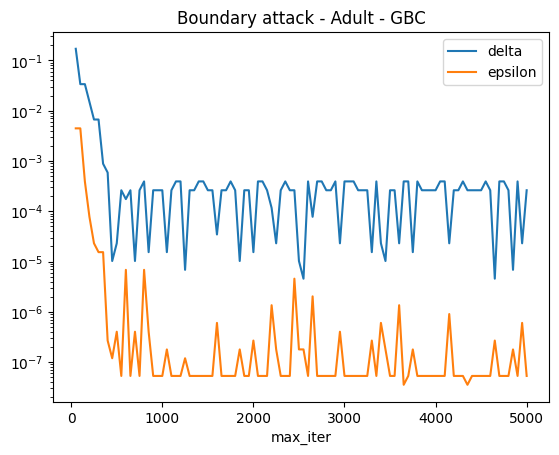

In [31]:
plt.plot(max_iter_list, curr_delta_list)
plt.plot(max_iter_list, curr_epsilon_list)
plt.yscale('log')
plt.title(f'Boundary attack - Adult - GBC')
# plt.ylabel(f'delta')
plt.xlabel(f'max_iter')
plt.legend(['delta', 'epsilon'])

plt.show()

In [17]:
nn_max_iter_list = []
nn_curr_delta_list = []
nn_curr_epsilon_list = []

for max_iter in range(50,5001,50):
    print(f'{max_iter} Done.')
    nn_max_iter_list.append(max_iter)
    attack = BoundaryAttack(estimator=KerasClassifier(models['nn_2'], clip_values=(0,1)), verbose= False, batch_size=64, max_iter=max_iter)
    x_adv = attack.generate(X_test_re,y_test_re) 
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        nn_curr_delta_list.append(attack.curr_delta)
        # print(f'The current delta is: {attack.curr_delta}')
        nn_curr_epsilon_list.append(attack.curr_epsilon)
        # print(f'The current epsilon is: {attack.curr_epsilon}')
    else:
        break

50 Done.
100 Done.
150 Done.
200 Done.
250 Done.
300 Done.
350 Done.
400 Done.
450 Done.
500 Done.
550 Done.
600 Done.
650 Done.
700 Done.
750 Done.
800 Done.
850 Done.
900 Done.
950 Done.
1000 Done.
1050 Done.
1100 Done.
1150 Done.
1200 Done.
1250 Done.
1300 Done.
1350 Done.
1400 Done.
1450 Done.
1500 Done.
1550 Done.
1600 Done.
1650 Done.
1700 Done.
1750 Done.
1800 Done.
1850 Done.
1900 Done.
1950 Done.
2000 Done.
2050 Done.
2100 Done.
2150 Done.
2200 Done.
2250 Done.
2300 Done.
2350 Done.
2400 Done.
2450 Done.
2500 Done.
2550 Done.
2600 Done.
2650 Done.
2700 Done.
2750 Done.
2800 Done.
2850 Done.
2900 Done.
2950 Done.
3000 Done.
3050 Done.
3100 Done.
3150 Done.
3200 Done.
3250 Done.
3300 Done.
3350 Done.
3400 Done.
3450 Done.
3500 Done.
3550 Done.
3600 Done.
3650 Done.
3700 Done.
3750 Done.
3800 Done.
3850 Done.
3900 Done.
3950 Done.
4000 Done.
4050 Done.
4100 Done.
4150 Done.
4200 Done.
4250 Done.
4300 Done.
4350 Done.
4400 Done.
4450 Done.
4500 Done.
4550 Done.
4600 Done.
4650 Don

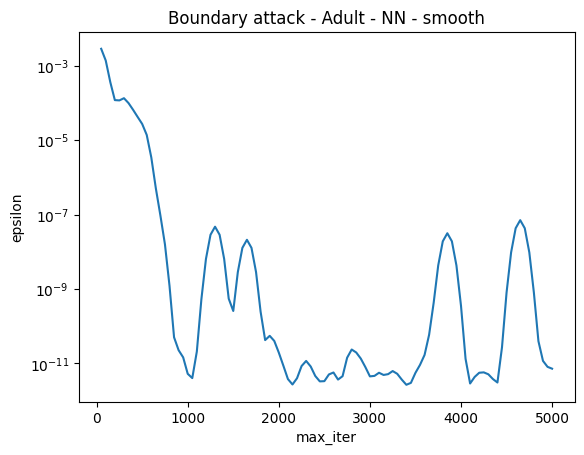

In [18]:
nn_ysmoothed = gaussian_filter1d(nn_curr_epsilon_list, sigma=1)

plt.plot(nn_max_iter_list, nn_ysmoothed)
plt.yscale('log')
plt.title(f'Boundary attack - Adult - NN - smooth')
plt.ylabel(f'epsilon')
plt.xlabel(f'max_iter')


plt.show()
# plt.scatter(x, y)

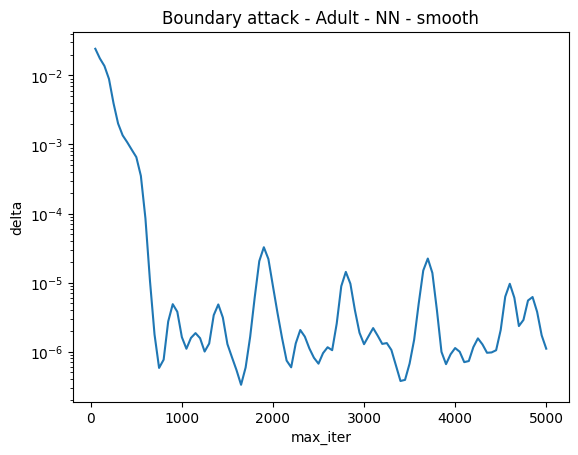

In [21]:
nn_ysmoothed = gaussian_filter1d(nn_curr_delta_list, sigma=1)

plt.plot(nn_max_iter_list, nn_ysmoothed)
plt.yscale('log')
plt.title(f'Boundary attack - Adult - NN - smooth')
plt.ylabel(f'delta')
plt.xlabel(f'max_iter')


plt.show()
# plt.scatter(x, y)

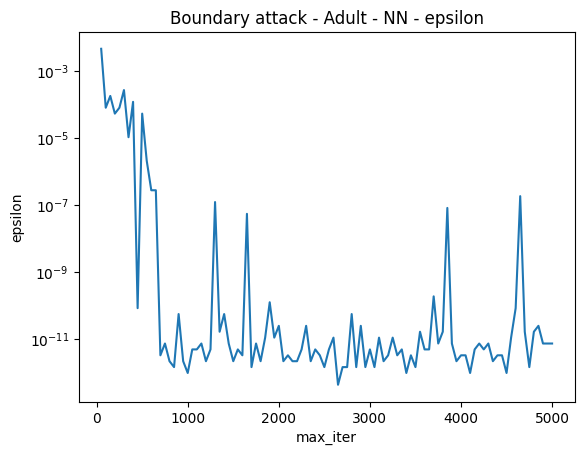

In [26]:
plt.plot(nn_max_iter_list, nn_curr_epsilon_list)
plt.yscale('log')
plt.title(f'Boundary attack - Adult - NN - epsilon')
plt.ylabel(f'epsilon')
plt.xlabel(f'max_iter')

plt.show()

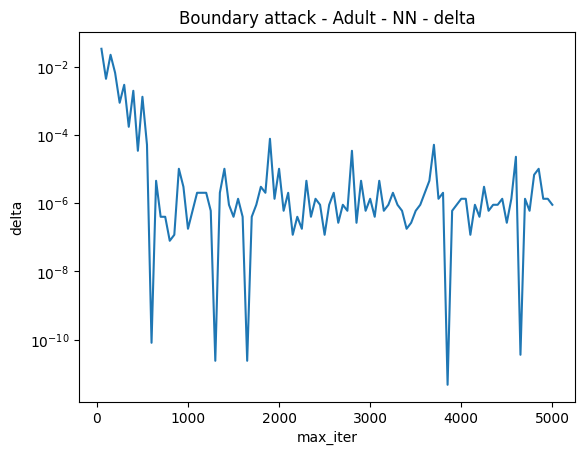

In [27]:
plt.plot(nn_max_iter_list, nn_curr_delta_list)
plt.yscale('log')
plt.title(f'Boundary attack - Adult - NN - delta')
plt.ylabel(f'delta')
plt.xlabel(f'max_iter')

plt.show()

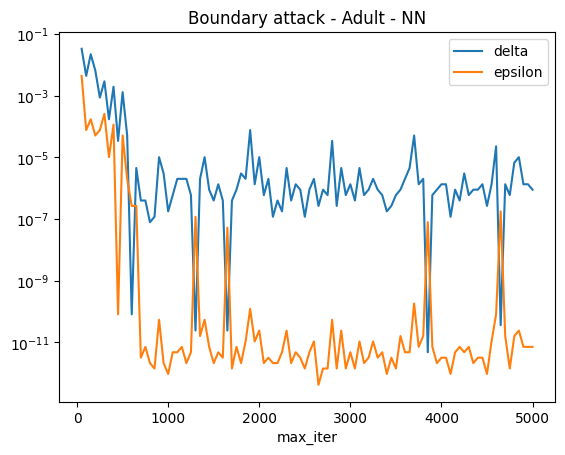

In [30]:
plt.plot(nn_max_iter_list, nn_curr_delta_list)
plt.plot(nn_max_iter_list, nn_curr_epsilon_list)
plt.yscale('log')
plt.title(f'Boundary attack - Adult - NN')
# plt.ylabel(f'delta')
plt.xlabel(f'max_iter')
plt.legend(['delta', 'epsilon'])

plt.show()